In [1]:
import pandas as pd
from lib.pitch_control import plot_pitch_control, KNNPitchControl, SpearmanPitchControl, FernandezPitchControl
from lib.draw import pitch
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/all_goals.csv', low_memory=False)
df.edgecolor.fillna('white', inplace=True)
df.bgcolor.fillna('black', inplace=True)
df.sample(5)

,bgcolor,dx,dy,edgecolor,frame,play,player,player_num,team,x,y,z,coords,player_obj,num,name,play_id
9251,white,-0.207847,0.071473,black,114,Fulham 0 - [1] Liverpool,12448,NaN,defense,17.141407,35.734631,0.0,NaN,NaN,NaN,NaN,3
31561,red,0.094248,-0.391487,white,52,Liverpool [3] - 0 Norwich,12,14.0,attack,19.348575,81.250004,0.0,NaN,NaN,NaN,NaN,16
55174,blue,-0.362716,-0.156620,white,116,Liverpool [1] - 0 Everton,9526,NaN,defense,37.364946,26.028286,0.0,NaN,NaN,NaN,NaN,6
60023,red,0.000316,-0.019695,white,170,Liverpool [2] - 0 Everton,2131,NaN,attack,67.709280,71.643775,0.0,NaN,NaN,NaN,NaN,9
19035,blue,0.000000,0.000000,white,91,Liverpool [2] - 0 Porto,8161,NaN,defense,98.775510,-0.210084,0.0,NaN,NaN,NaN,NaN,11


In [3]:
game = df[df.play == 'Liverpool [2] - 0 Porto']
frame = game[game.frame == 120]

In [4]:
pc_model = KNNPitchControl()
control1 = pc_model.predict(frame)
pc_model = KNNPitchControl(lags=[0], smoothing=8)
control2 = pc_model.predict(frame)
pc_model = KNNPitchControl(lags=[5, 15, 25], smoothing=6)
control3 = pc_model.predict(frame)
pc_model = KNNPitchControl(lags=[5, 15, 25], smoothing=6, distance_basis=350)
control4 = pc_model.predict(frame)
# pc_model = SpearmanPitchControl()
# control5 = pc_model.predict(frame)
# pc_model = FernandezPitchControl()
# control6 = pc_model.predict(frame, game)

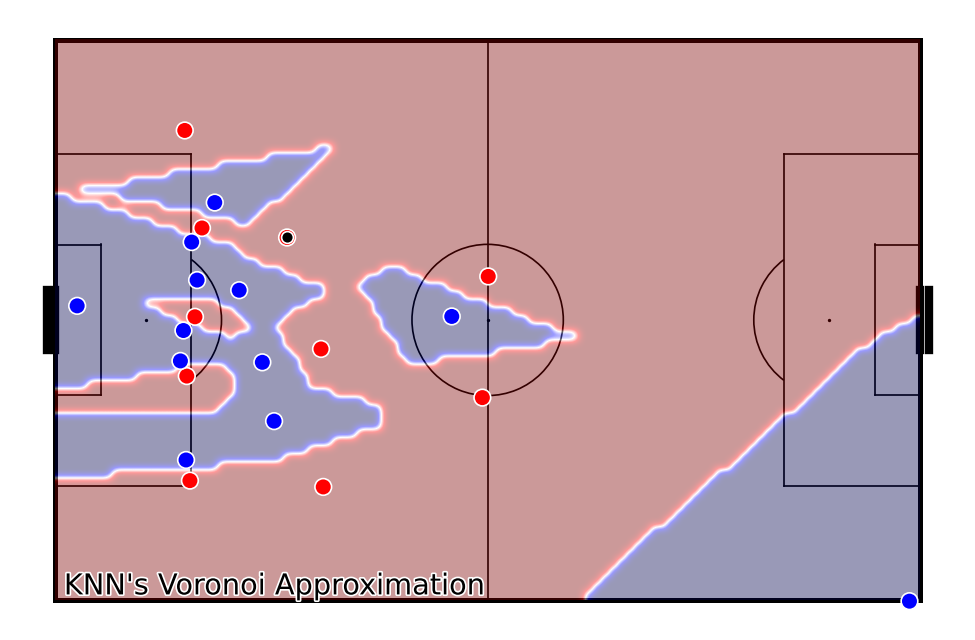

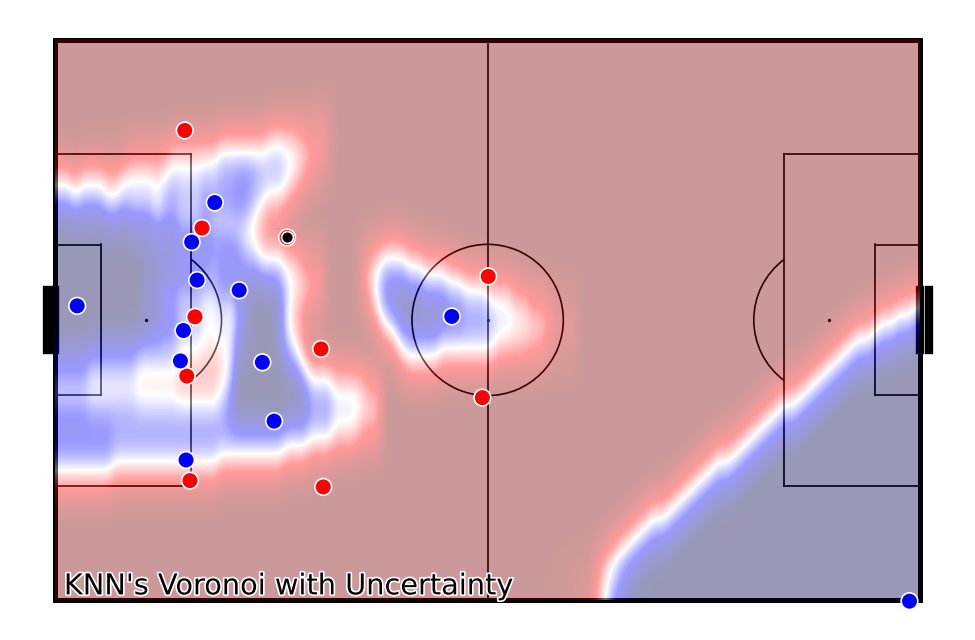

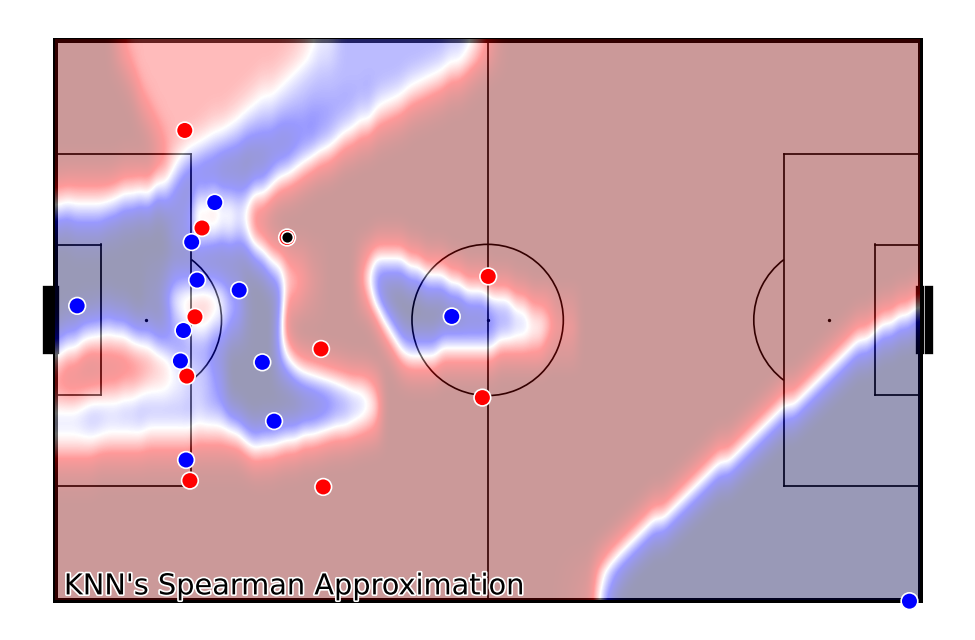

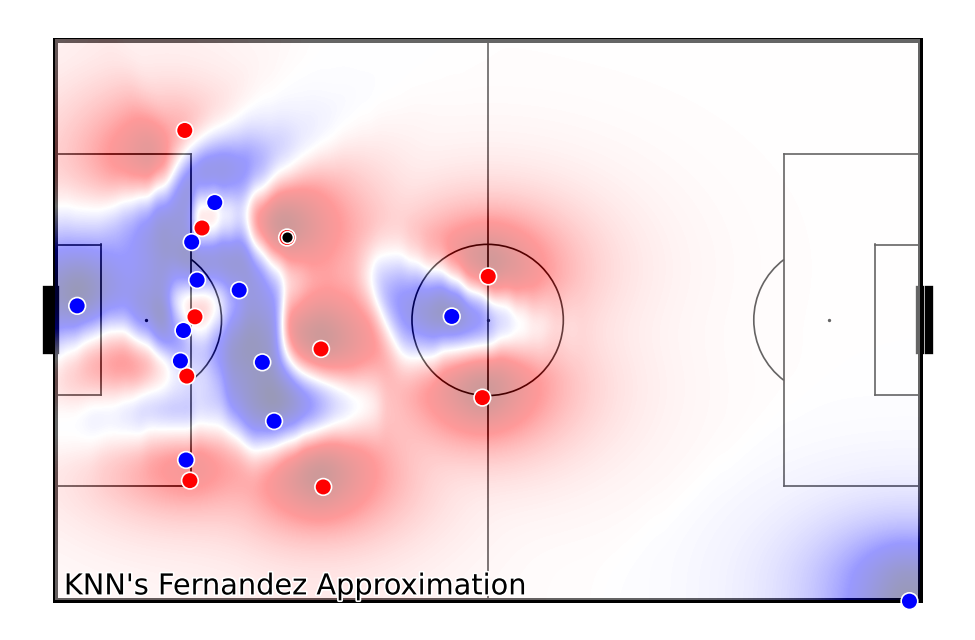

In [5]:
plot_pitch_control(frame, pc_model.grid, control1, modelname='KNN\'s Voronoi Approximation')
plot_pitch_control(frame, pc_model.grid, control2, modelname='KNN\'s Voronoi with Uncertainty')
plot_pitch_control(frame, pc_model.grid, control3, modelname='KNN\'s Spearman Approximation')
# plot_pitch_control(frame, pc_model.grid, control5, modelname='Spearman\'s Pitch Control')
plot_pitch_control(frame, pc_model.grid, control4, modelname='KNN\'s Fernandez Approximation')
# plot_pitch_control(frame, pc_model.grid, control6, modelname='Fernandez\'s Pitch Control')